# Week 6: Functions Analyses

---
# Goal for Analysis and Visualization in Part 1

### Function:
1. reads in the file.
2. extracts the observation date column to a list.
3. removes the month from each observation date and places in another list.
4. checks each observation month to see what season it is in.
5. for each observation, a season is appended to a new list.
6. a dictionary with keys as seasons and values as observation counts is created.
7. the dictionary is plotted as a histogram.

## Part 1

In [4]:
def visualize_occurrences_by_season(filename):    
    
    # read in the csv data file of species observations
    data = pd.read_csv(filename)
    
    # extract the dates column to a list
    dates = data["observed_on"].to_list()
    
    # create an empty list for dates that are separated using datetime
    dates_separated = list()
    
    # iterate through dates to separate them using datetime
    for i in dates:
        dates_separated.append(datetime.strptime(i, "%Y-%m-%d"))
    
    # create an empty list for observations by month
    months = list()
    
    # iterate through separated dates list to extract just the month as an integer
    for m in dates_separated:
        months.append(m.month)
    
    # create an empty list for observations by season
    observations_by_season = list()
    
    # iterate through each observation in the months list
    # by using an if statement for each season
    # if the month is in the season's numerical range
    # the season is appended to the observation_by_season list
    for x in months:
        if x in range(1, 4):
            observations_by_season.append('winter')
        if x in range(4, 7):
            observations_by_season.append('spring')
        if x in range(7, 10):
            observations_by_season.append('summer')
        if x in range (10, 13):
            observations_by_season.append('autumn')
    
    # create an empty default dictionary with integers
    # for the count of each observation by season
    season_counts = defaultdict(int)
    
    # iterate through seasons in observations_by_season list
    # add a count for each season to the season_counts dictionary
    for season in observations_by_season:
        season_counts[season] = season_counts[season] + 1
    
    # plot a histogram of the season_counts dictionary
    plt.bar(season_counts.keys(), season_counts.values())
    
    # parameters for the figure
    plt.xlabel('Seasons')
    plt.ylabel('Number of Occurrences')
    plt.title('Bird Occurrences in the LA River Watershed by Season')
    plt.show()

In [4]:
import pandas
import pandas as pd
import datetime
import numpy
import matplotlib.pyplot as plt
from datetime import datetime
from collections import defaultdict

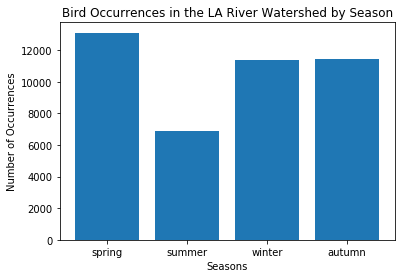

In [5]:
# display a histogram of bird occurrences in LA River Watershed by Season

visualize_occurrences_by_season('../data/iNaturalist_birds_LARW.csv')

In [8]:
# a function used to write a csv file that has a list of all unique species
# and the species corresponding counts

def counts_of_species(filename):
    
    data = pd.read_csv(filename)
    
    species_counts = (data['taxon_species_name'].value_counts()).to_dict()
    
    with open('species_counts.csv', 'w', newline = '') as csvfile:
        writer = csv.writer(csvfile)
        for species, counts in species_counts.items():
            writer.writerow([species, counts])

In [11]:
counts_of_species('../data/iNaturalist_birds_LARW.csv')
 
# the code below is to open and print the species count csv file

#with open('species_counts.csv', 'r') as rf:
    #reader = csv.reader(rf)
    #for line in rf:
        #print(line)

## Part 2

In [1]:
import csv

species = dict()

# opens csv file with DictReader using csv module
with open('../data/iNaturalist_birds_LARW.csv', newline = '') as csvfile:
    reader = csv.DictReader(csvfile)
    
    # iterates through each row in the csv file
    # prints the species name and whether or not the species is considered in its natural range
    for row in reader:
        #print(row['taxon_species_name'], row['out_of_range'])

## Part 3

In [27]:
# function used to write to a text file a description of the unique bird species, genera,
# families, and orders found in the dataset

def unique_birds(filename):
    data = pd.read_csv(filename)

    unique_species = len(set(data['taxon_species_name']))
    unique_genera = len(set(data['taxon_genus_name']))
    unique_families = len(set(data['taxon_family_name']))
    unique_orders = len(set(data['taxon_order_name']))
    
    unique_counts_text = 'In the LA River Watershed, according to the dataset:\nThere are {} unique species of birds.\nThere are {} unique genera of birds.\nThere are {} unique families of birds.\nAnd, there are {} unique orders of birds.'.format(unique_species, unique_genera, unique_families, unique_orders)
    
    with open('unique_birds.txt', 'w') as wf:
        for line in unique_counts_text:
            wf.write(line)

In [28]:
unique_birds('../data/iNaturalist_birds_LARW.csv')

In [30]:
# opening and printing the text file written above
# about how many species, genera, families, and orders of birds

with open('unique_birds.txt', 'r') as rf:
    for line in rf:
        print(line)

In the LA River Watershed, according to the dataset:

There are 366 unique species of birds.

There are 206 unique genera of birds.

There are 65 unique families of birds.

And, there are 19 unique orders of birds.


In [79]:
# function for visualizing the bird occurrences that are considered inside or
# outside of their natural ranges
# function also writes to a csv file the number of birds that were inside
# or outside of their natural ranges

def bird_range(filename):
    
    # read in data
    data = pd.read_csv(filename)
    
    # extract range column and move to list called ranges
    ranges = data['out_of_range'].to_list()
    
    # create an empty list for renamed range classification
    # originally: True/False
    # new: Out of Range/In Range
    ranges_renamed = list()
    
    # iterate through the true/false values in ranges list
    # i == 1 corresponds to True which means the bird is out of range
    for i in ranges:
        if (i == 1):
            ranges_renamed.append('Out of Range')
        else:
            ranges_renamed.append('In Range')
    
    # create an empty defaultdict with values of integers
    range_counts = defaultdict(int)
    
    # iterate through new range list items
    # for each item, move to dictionary and add a count of 1 for that item to the value
    # end result is a dictionary with 2 keys: Out of Range, In Range
    # each key has the counts of the birds corresponding to both
    for x in ranges_renamed:
        range_counts[x] = range_counts[x] + 1
    
    # plot a histogram using the dictionary to display in range vs. out of range
    plt.bar(range_counts.keys(), range_counts.values())
    
    # parameters for the figure
    plt.ylabel('Number of Occurrences')
    plt.title('Number of Bird Occurrences Inside or Outside Natural Ranges')
    plt.show()
    
    # write the counts of each range category to a csv file
    with open('bird_ranges.csv', 'w', newline = '') as csvfile:
        writer = csv.writer(csvfile)
        for r, c in range_counts.items():
            writer.writerow([r, c])

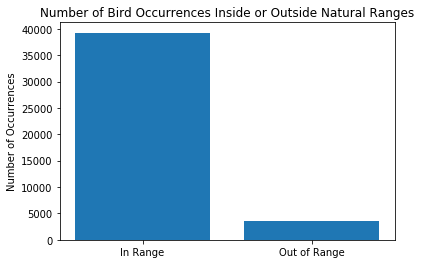

In [80]:
bird_range('../data/iNaturalist_birds_LARW.csv')

In [76]:
# opening the csv file containing the counts of birds
# inside or outside of range 

with open('bird_ranges.csv', 'r') as rf:
    for i, line in enumerate(rf):
        if (i== 0):
            print('Bird Occurrences Inside Range:', line[-6:])
        if (i == 1):
            print('Bird Occurrences Outside Range:', line[-5:])

Bird Occurrences Inside Range: 39247

Bird Occurrences Outside Range: 3575

